In [2]:
import pandas as pd
import re

In [3]:
# Function to filter out problematic sentences
def is_valid_sentence(sentence):
    # Define regex patterns to match problematic characters or structures
    pattern1 = re.compile(r'[^\x00-\x7F]+|[\x00-\x1F\x7F]')  # Non-ASCII and control characters
    pattern2 = re.compile(r'[\\]')  # Backslashes
    
    # Return True only if the sentence matches neither pattern
    return not (pattern1.search(sentence) or pattern2.search(sentence))

# Read the dataset
dataset = pd.read_csv('../cleaned_dataset.csv')

# Filter out problematic sentences
dataset['text'] = dataset['text'].apply(lambda x: x if is_valid_sentence(x) else None)
dataset = dataset.dropna().reset_index(drop=True)
dataset.head()

,text
0,Bitch cant get shit from me but bubble gum nd ...
1,@islandboi_B yes that's what's up. Nothin like...
2,Mixed huh !? Those black ass knees and elbows ...
3,The bul Mike James from @mavs ain't shit n he ...
4,It took for a whole stranger to tell me he PRO...


In the earlier notebook (the initial 2000 sentences) we did the following:
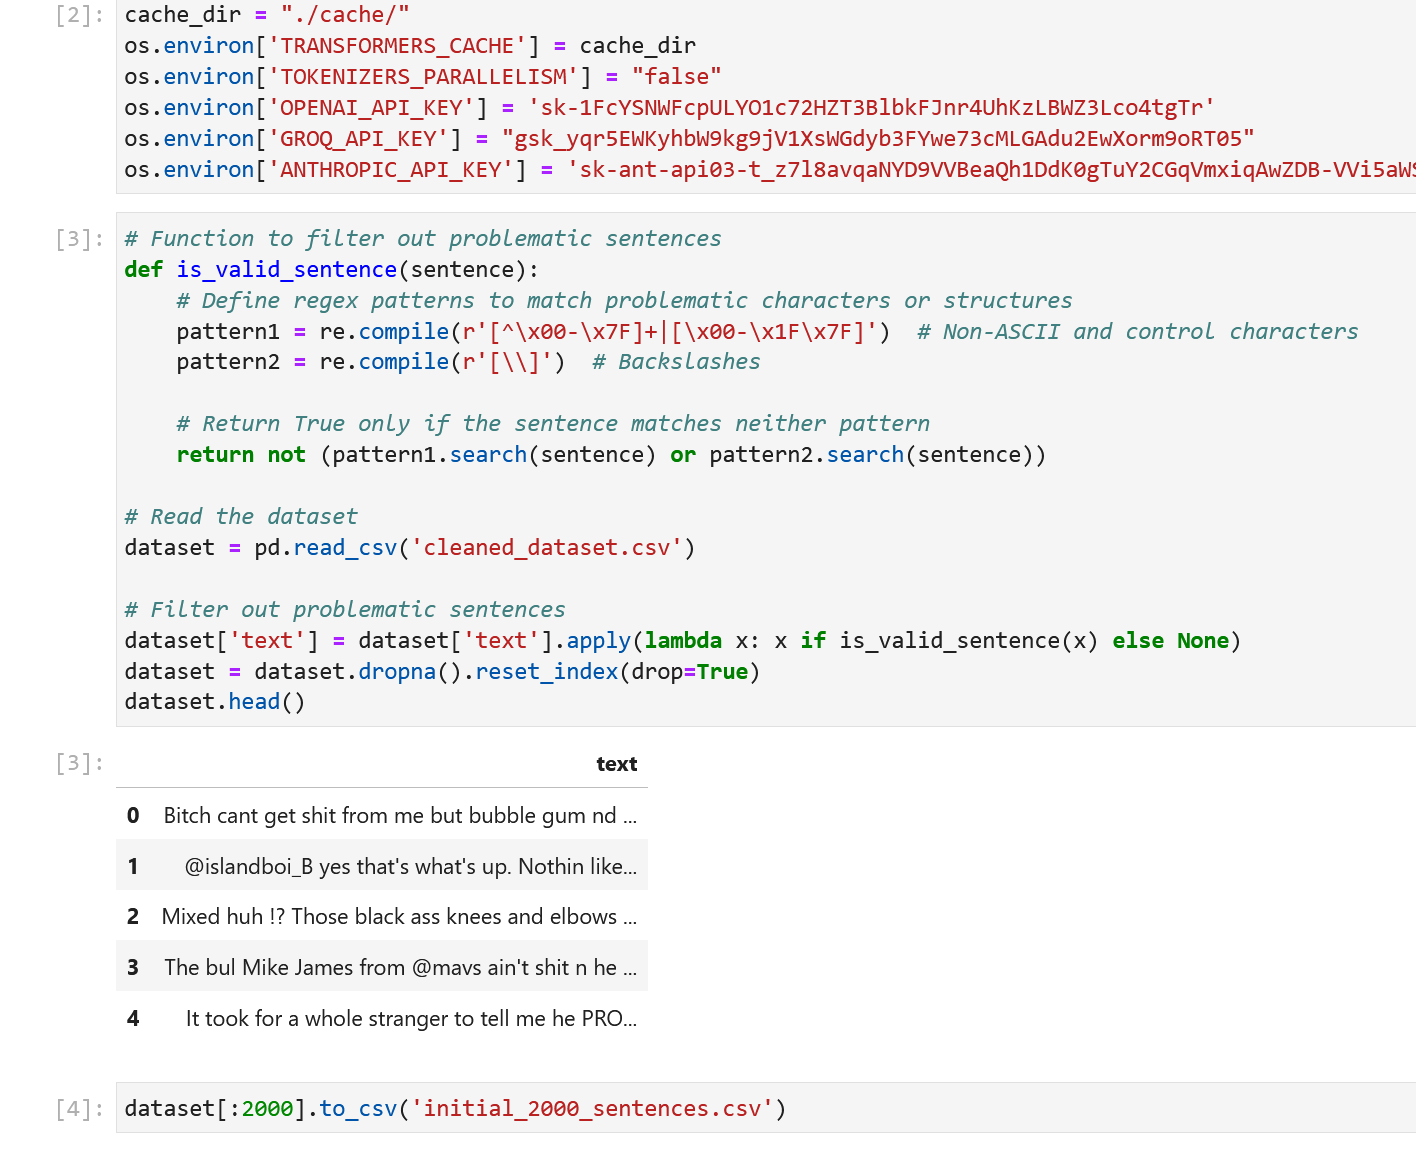

Now we have applied the same steps on cleaned_dataset.csv and and will extract sentences from index 2000:5000.  

In [7]:
dataset[2000:5000].to_csv('2000-5000_sentences.csv', index=False)

We will also save the cleaned_dataset.csv with is_valid_sentences funtion filter applied this time:

In [6]:
dataset.to_csv('cleaned_dataset.csv', index=False)